In [18]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
world = pd.read_csv("world.csv")
world.head()

,Country Name,Time,Country Code,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],...,"Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%) [SH.DYN.NCOM.FE.ZS]","Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population) [SH.STA.AIRP.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population) [SH.STA.AIRP.FE.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS]
0,Afghanistan,2016,AFG,97.09935985,1.918810496,33.981,36.4,44.1,3.120401382,11.2,...,27.7,211.1,195,229,1.9,13.9,64.28648363,42.05418277,59.9219787,46.4
1,Albania,2016,ALB,100,0.15693402,12.08,2.9,93.1,177.7584991,66.3634447,...,13.1,68,55,82,0.4,0.2,91.02037015,97.70487655,98.28801438,24.9
2,Algeria,2016,DZA,99.97308153,0.116624156,25.25,14.8,75.7,176.265213,42.94552688,...,13.2,49.7,44,55,0.6,1.9,93.51585098,87.54231646,89.67236867,30
3,American Samoa,2016,ASM,..,..,..,..,..,..,..,...,..,..,..,..,..,..,99.69643741,55.60755445,..,..
4,Andorra,2016,AND,100,..,8.8,..,..,1883.995361,97.93063712,...,..,..,..,..,..,..,100,100,100,12.8


In [20]:
life = pd.read_csv('life.csv')
life.head()

,Country,Country Code,Year,Life expectancy at birth (years)
0,Afghanistan,AFG,2016,Low
1,Albania,ALB,2016,High
2,Algeria,DZA,2016,High
3,Angola,AGO,2016,Low
4,Antigua and Barbuda,ATG,2016,Medium


In [21]:
for index, row in world.iterrows():
    if not (row['Country Code'] in list(life['Country Code'])):
        #print(row['Country Name'])
        world.drop(index, inplace=True)
print(len(life))
print(len(world))

183
183


In [22]:
features = world.columns[3:]

In [23]:
to_merge = life[['Country Code', 'Life expectancy at birth (years)']]
to_merge.head()

,Country Code,Life expectancy at birth (years)
0,AFG,Low
1,ALB,High
2,DZA,High
3,AGO,Low
4,ATG,Medium


In [24]:
world = world.merge(to_merge, on='Country Code')
y = world['Life expectancy at birth (years)']
world.drop(['Life expectancy at birth (years)'], inplace=True, axis =1)

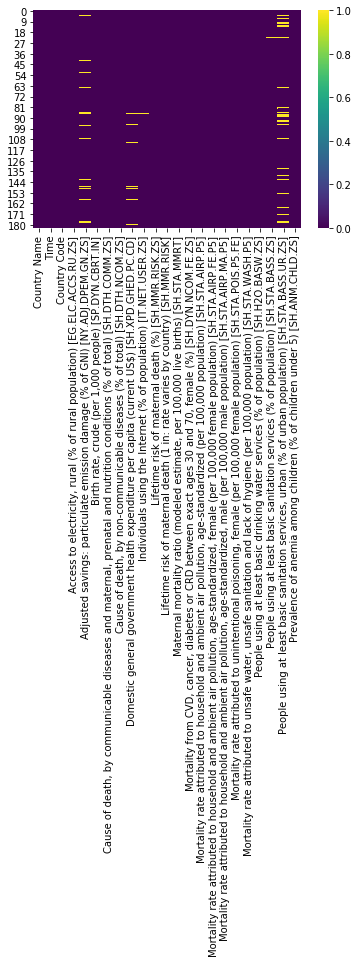

In [25]:
sns.heatmap(world=="..", cmap="viridis")

In [26]:
world_link = world[['Country Name', 'Time', 'Country Code']]
world.drop(['Country Name', 'Time', 'Country Code'], axis = 1, inplace=True)

In [27]:
world.replace(["..", np.nan], inplace=True)
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")
imp_median.fit(world)
print(imp_median.transform(world))

[[ 97.09935985   1.9188105   33.981      ...  42.05418277  59.9219787
   46.4       ]
 [100.           0.15693402  12.08       ...  97.70487655  98.28801438
   24.9       ]
 [ 99.97308153   0.11662416  25.25       ...  87.54231646  89.67236867
   30.        ]
 ...
 [ 64.35986727   1.83889909  31.627      ...  58.77298382  87.85827458
   83.5       ]
 [  9.18274198   0.72759195  37.292      ...  26.08649095  36.23562282
   54.2       ]
 [ 18.12871685   0.89509097  32.864      ...  36.89173117  47.5874732
   41.7       ]]


In [28]:
new_values = pd.DataFrame(imp_median.transform(world))
new_values.columns = features
new_values.head()

,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%) [SH.DYN.NCOM.FE.ZS]","Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population) [SH.STA.AIRP.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population) [SH.STA.AIRP.FE.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS]
0,97.099360,1.918810,33.981,36.4,44.1,3.120401,11.200000,3.330914,30.0,673.0,27.7,211.1,195.0,229.0,1.9,13.9,64.286484,42.054183,59.921979,46.4
1,100.000000,0.156934,12.080,2.9,93.1,177.758499,66.363445,0.027187,3700.0,16.0,13.1,68.0,55.0,82.0,0.4,0.2,91.020370,97.704877,98.288014,24.9
2,99.973082,0.116624,25.250,14.8,75.7,176.265213,42.945527,0.371412,270.0,113.0,13.2,49.7,44.0,55.0,0.6,1.9,93.515851,87.542316,89.672369,30.0
3,0.000000,0.629413,41.882,63.4,27.4,42.028805,13.000000,1.501205,67.0,246.0,16.0,118.5,117.0,120.0,2.0,48.8,55.084276,48.627945,63.336756,50.9
4,100.000000,0.629413,15.717,11.9,81.8,310.397186,73.000000,0.083551,1200.0,43.0,20.0,29.9,24.0,37.0,0.4,0.1,96.739186,87.504282,63.336756,32.3


In [29]:
impute_mean = pd.DataFrame(new_values.mean())
impute_mean

,0
"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",75.256779
Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],0.459752
"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]",21.236530
"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]",22.257923
"Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",68.750820
Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],661.806556
Individuals using the Internet (% of population) [IT.NET.USER.ZS],48.086333
Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],0.732531
Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],3573.234973
"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]",165.076503


In [30]:
impute_median = pd.DataFrame(new_values.median())
impute_median

,0
"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",98.471641
Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],0.267191
"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]",18.858000
"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]",12.700000
"Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",74.800000
Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],168.928558
Individuals using the Internet (% of population) [IT.NET.USER.ZS],48.052274
Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],0.142538
Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],700.000000
"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]",55.000000


In [31]:
impute_var = pd.DataFrame(new_values.var())
impute_var

,0
"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",1.228136e+03
Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],2.380946e-01
"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]",1.012546e+02
"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]",4.121300e+02
"Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",4.793260e+02
Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],1.406088e+06
Individuals using the Internet (% of population) [IT.NET.USER.ZS],8.177976e+02
Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],1.592812e+00
Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],3.929599e+07
"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]",5.656015e+04


In [32]:
task2a = pd.concat([impute_median, impute_mean, impute_var], axis =1, sort=False)
task2a.columns = ['median', 'mean', 'variance']
task2a.index.name = 'feature'
task2a

,median,mean,variance
feature,,,
"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",98.471641,75.256779,1.228136e+03
Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],0.267191,0.459752,2.380946e-01
"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]",18.858000,21.236530,1.012546e+02
"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]",12.700000,22.257923,4.121300e+02
"Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",74.800000,68.750820,4.793260e+02
Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],168.928558,661.806556,1.406088e+06
Individuals using the Internet (% of population) [IT.NET.USER.ZS],48.052274,48.086333,8.177976e+02
Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],0.142538,0.732531,1.592812e+00
Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],700.000000,3573.234973,3.929599e+07


In [33]:
task2a.to_csv("task2a.csv")

In [34]:
world.head()

,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%) [SH.DYN.NCOM.FE.ZS]","Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population) [SH.STA.AIRP.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population) [SH.STA.AIRP.FE.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS]
0,97.09935985,1.918810496,33.981,36.4,44.1,3.120401382,11.2,3.330913861,30,673,27.7,211.1,195,229,1.9,13.9,64.28648363,42.05418277,59.9219787,46.4
1,100,0.15693402,12.08,2.9,93.1,177.7584991,66.3634447,0.027187058,3700,16,13.1,68,55,82,0.4,0.2,91.02037015,97.70487655,98.28801438,24.9
2,99.97308153,0.116624156,25.25,14.8,75.7,176.265213,42.94552688,0.371412332,270,113,13.2,49.7,44,55,0.6,1.9,93.51585098,87.54231646,89.67236867,30
3,0,0.629412833,41.882,63.4,27.4,42.02880478,13,1.501205426,67,246,16,118.5,117,120,2,48.8,55.08427629,48.62794479,63.33675598,50.9
4,100,0.629412833,15.717,11.9,81.8,310.3971863,73,0.083550562,1200,43,20,29.9,24,37,0.4,0.1,96.73918628,87.50428238,63.33675598,32.3


In [35]:
X = new_values
#y = life['Life expectancy at birth (years)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Accuracy of decision tree: " + str(accuracy_score(y_test, pred)) + "%")

[[21  0  6]
 [ 0 14  2]
 [ 3  5 10]]
              precision    recall  f1-score   support

        High       0.88      0.78      0.82        27
         Low       0.74      0.88      0.80        16
      Medium       0.56      0.56      0.56        18

   micro avg       0.74      0.74      0.74        61
   macro avg       0.72      0.74      0.73        61
weighted avg       0.74      0.74      0.74        61

Accuracy of decision tree: 0.7377049180327869%


In [36]:
scaler = StandardScaler()
scaler.fit(new_values)
scaled_features = scaler.transform(new_values)
scaled_features_df = pd.DataFrame(scaled_features)
scaled_features_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.624987,2.998388,1.270002,0.698531,-1.129031,-0.557009,-1.293399,2.064480,-0.566782,2.141573,2.099678,1.657252,1.611964,1.661690,1.104742,0.067469,-1.339529,-1.093429,-0.729232,0.543931
1,0.707983,-0.622295,-0.912459,-0.956162,1.115215,-0.409329,0.640877,-0.560413,0.020278,-0.628556,-0.530753,-0.337515,-0.380631,-0.304145,-0.516058,-0.592508,0.262404,0.808957,0.812604,-0.638900
2,0.707213,-0.705132,0.399947,-0.368375,0.318279,-0.410591,-0.180260,-0.286917,-0.528391,-0.219572,-0.512736,-0.592611,-0.537192,-0.665217,-0.299951,-0.510613,0.411937,0.461556,0.466362,-0.358322
3,-2.153339,0.348656,2.057346,2.032165,-1.893906,-0.524107,-1.230283,0.610731,-0.560863,0.341200,-0.008270,0.366438,0.501804,0.204030,1.212795,1.748726,-1.890938,-0.868709,-0.592001,0.791500
4,0.707983,0.348656,-0.550028,-0.511618,0.597665,-0.297165,0.873584,-0.515631,-0.379626,-0.514715,0.712396,-0.868617,-0.821848,-0.905931,-0.516058,-0.597326,0.605084,0.460256,-0.592001,-0.231786


In [37]:
scaled_features_df.columns = features

In [38]:
X = scaled_features_df
#y = life['Life expectancy at birth (years)']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [40]:
knn5 = KNeighborsClassifier(n_neighbors=5)

In [41]:
knn5.fit(X_train, y_train)
pred5 = knn5.predict(X_test)

In [50]:
print(confusion_matrix(y_test, pred5))
print(classification_report(y_test, pred5))
print("Accuracy of k-nn (k=5): " + str(accuracy_score(y_test, pred5)) + "%")

[[26  0  1]
 [ 0 14  2]
 [ 6  2 10]]
              precision    recall  f1-score   support

        High       0.81      0.96      0.88        27
         Low       0.88      0.88      0.88        16
      Medium       0.77      0.56      0.65        18

   micro avg       0.82      0.82      0.82        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.82      0.82      0.81        61

Accuracy of k-nn (k=5): 0.819672131147541%


In [43]:
errors = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    errors.append(np.mean(pred_i != y_test))

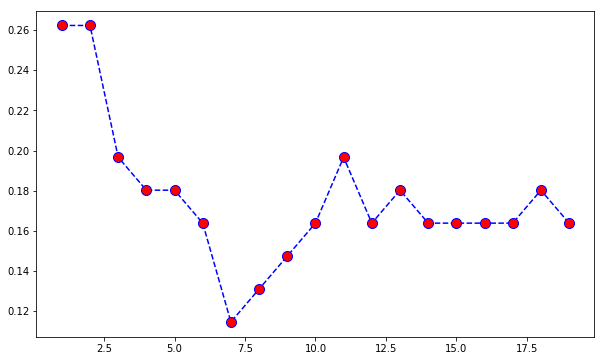

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), errors,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [49]:
knn6 = KNeighborsClassifier(n_neighbors=7)
knn6.fit(X_train, y_train)
pred6 = knn6.predict(X_test)
print(confusion_matrix(y_test, pred6))
print(classification_report(y_test, pred6))
print("Accuracy of k-nn (k=7): " + str(accuracy_score(y_test, pred6)) + "%")

[[27  0  0]
 [ 0 15  1]
 [ 5  1 12]]
              precision    recall  f1-score   support

        High       0.84      1.00      0.92        27
         Low       0.94      0.94      0.94        16
      Medium       0.92      0.67      0.77        18

   micro avg       0.89      0.89      0.89        61
   macro avg       0.90      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61

Accuracy of k-nn (k=7): 0.8852459016393442%


In [48]:
knn6 = KNeighborsClassifier(n_neighbors=10)
knn6.fit(X_train, y_train)
pred6 = knn6.predict(X_test)
print(confusion_matrix(y_test, pred6))
print(classification_report(y_test, pred6))
print("Accuracy of k-nn (k=10): " + str(accuracy_score(y_test, pred6)) + "%")

[[26  0  1]
 [ 0 15  1]
 [ 6  2 10]]
              precision    recall  f1-score   support

        High       0.81      0.96      0.88        27
         Low       0.88      0.94      0.91        16
      Medium       0.83      0.56      0.67        18

   micro avg       0.84      0.84      0.84        61
   macro avg       0.84      0.82      0.82        61
weighted avg       0.84      0.84      0.83        61

Accuracy of k-nn (k=10): 0.8360655737704918%


[[13  4 14]
 [ 6  5  8]
 [ 3  1  7]]
              precision    recall  f1-score   support

        High       0.59      0.42      0.49        31
         Low       0.50      0.26      0.34        19
      Medium       0.24      0.64      0.35        11

   micro avg       0.41      0.41      0.41        61
   macro avg       0.44      0.44      0.40        61
weighted avg       0.50      0.41      0.42        61



In [1]:
"hey what?".split()

['hey', 'what?']